In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error,precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv("shen_268_parcellation_networklabels.csv",encoding="utf-8")
filePath = 'D:\jupyter_psychology\Shen268\ROI_FC_r_per\session1'
filePath_list = os.listdir(filePath)
pca_alg = PCA(n_components = 1, whiten=True)
num = [29,34,20,90,50,18,9,18]
num1 = [0,29,63,83,173,223,241,250,268]
net = [10,12,16,52,53,54,56,57,64,65,137,140,145,148,149,150,151,153,156,162,165,183,185,186,187,190,192,194,219,
      1,4,7,8,9,14,17,19,21,22,30,31,47,48,55,70,111,112,116,139,142,143,147,154,157,164,182,184,193,196,199,242,246,247,
      3,5,6,13,49,50,85,86,90,96,115,134,138,141,203,222,223,225,227,239,
      2,11,15,18,20,28,29,32,36,44,83,88,91,93,94,95,99,101,103,104,105,106,107,108,110,113,114,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,135,136,144,146,152,155,169,178,217,220,221,224,226,229,230,231,232,233,234,236,237,238,243,244,245,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,
      23,24,25,26,27,33,34,35,37,38,39,40,45,46,51,58,60,61,62,63,84,89,92,97,109,158,159,160,161,163,166,167,168,170,171,172,173,174,179,180,181,188,189,191,195,197,202,218,228,235,
      42,68,72,75,77,79,80,82,87,98,176,198,205,207,208,211,215,216,
      76,78,81,100,102,212,213,214,241,
      41,43,59,66,67,69,71,73,74,175,177,200,201,204,206,209,210,240]

In [3]:

train_Y = []
train_X = np.empty(shape=[0,1082],dtype=float)

for fp in filePath_list:
    fp_a = ['D:\jupyter_psychology\Shen268\ROI_FC_r_per\session1\\'+fp,'D:\jupyter_psychology\Shen268\ROI_FC_r_per\session2\\'+fp,'D:\jupyter_psychology\Shen268\ROI_FC_r_per\session3\\'+fp]
    train_Y = np.append(train_Y,[0,1,2],axis=0)
    for s in range(3):
        data =  np.loadtxt(fp_a[s])
        #print(data)
        tmp = np.empty(shape=[0,268],dtype=float)
        #行排列
        for i in range(268):
            tmp = np.append(tmp,[data[net[i]-1,:]],axis=0)
        data =  np.empty(shape=[0,268],dtype=float)
        #列排列，8*8网络
        for i in range(268):
            data = np.append(data,[tmp[:,net[i]-1]],axis=0)
        #print(data)
        net_cnct = []
        for i in range(8):
            for j in range(i+1):
                network = data[num1[i]:num1[i+1],num1[j]:num1[j+1]]
                #print(network)
                network = pca_alg.fit_transform(network)
                network = network.ravel()
                net_cnct.extend(list(network))
        train_X = np.append(train_X,[np.array(net_cnct)],axis=0)
    #break;

In [4]:
# 数据划分
train_x = train_X[:159]
train_y = train_Y[:159]
test_x = train_X[159:]
test_y = train_Y[159:]
# 数据标准化 特征标度
scaler = StandardScaler()
X_train = scaler.fit_transform(train_x)
X_test = scaler.transform(test_x)



In [5]:
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
scaler = StandardScaler()
X = np.arange(0,201,3)
num = [29,34,20,90,50,18,9,18]
num1 = [0,29,63,83,173,223,241,250,268]
df = pd.read_csv("shen_268_parcellation_networklabels.csv",encoding="utf-8")
importance = {'medial frontal':0,'frontoparietal':0,'default mode':0,'subcortical-cerebellum':0,'motor':0,'visual I':0,'visual II':0,'visual association':0}
net_name = ['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']

total_importance = []    
#kf = KFold(n_splits=10,shuffle=False)  # 初始化KFold
#for train_index , test_index in kf.split(X):  # 调用split方法切分数据
loo = LeaveOneOut()
for train_index , test_index in loo.split(X):  # 调用split方法切分数据
    train_x = train_X[X[train_index]]
    train_y = train_Y[X[train_index]]
    #print('train_index:%s , test_index: %s ' %(X[train_index],X[test_index]))
    #print(train_x,train_y)
    train_x = np.append(train_x,train_X[X[train_index]+1],axis=0)
    train_y = np.append(train_y,train_Y[X[train_index]+1],axis=0)
    #print(train_x,train_y,)
    train_x = np.append(train_x,train_X[X[train_index]+2],axis=0)
    train_y = np.append(train_y,train_Y[X[train_index]+2],axis=0)
    #print(train_x,train_y)
    test_x = train_X[X[test_index]]
    test_y = train_Y[X[test_index]]
    test_x = np.append(test_x,train_X[X[test_index]+1],axis=0)
    test_x = np.append(test_x,train_X[X[test_index]+2],axis=0)
    test_y = np.append(test_y,train_Y[X[test_index]+1],axis=0)
    test_y = np.append(test_y,train_Y[X[test_index]+2],axis=0)
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    params = {
        'booster': 'gbtree',
        'objective': 'multiclass',
        'num_class': 3,
        'num_leaves': 31,
        'subsample': 0.8,
        'bagging_freq': 1,
        'feature_fraction ': 0.8,
        'colsample_bytree':0.9,
        'slient': 1,
        'learning_rate ': 0.01,
        'seed': 0,
        'lambda_l1':0.1,
        'lambda_l2':0.2,
        'max_depth':5,
    }
    
    best_depth = 3
    best_score = 0
    for max_depth in range(3,10):
        classifier = RandomForestClassifier(max_depth=max_depth,n_estimators=20, criterion='gini', random_state=42)
        classifier.fit(train_x, train_y)
        pred_test_y = classifier.predict(test_x)
        score = accuracy_score(test_y, pred_test_y)
        if score > best_score:
            best_score = score
            best_depth = max_depth
    
    RF = RandomForestClassifier(max_depth=best_depth,n_estimators=20, criterion='gini', random_state=42)
    RF.fit(train_x, train_y)
    # 预测
    pred_test_y = RF.predict(test_x)
    pred_train_y = RF.predict(train_x)
    sum_acc += accuracy_score(test_y,pred_test_y)
    sum_pre += precision_score(test_y,pred_test_y,average='macro')
    sum_rec += recall_score(test_y,pred_test_y,average='macro')
    sum_f1 += f1_score(test_y,pred_test_y,average='macro')
    
    Node_importance = RF.feature_importances_
    index = 0
    net_importance =  np.zeros((8,8))
    
    total = 0
    for i in range(8):
        for j in range(i+1):
            sum_importance = 0
            for k in range(num[i]):
                sum_importance += Node_importance[index]
                index += 1
            net_importance[i][j] = sum_importance/num[i]
            total += net_importance[i][j]
    for i in range(8):
        for j in range(i+1):
            net_importance[i][j] = net_importance[i][j]/total
    total_importance.append(net_importance)
    #break



D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precis

In [6]:
print(sum_acc/67,sum_pre/67,sum_rec/67,sum_f1/67)

0.7114427860696514 0.5812603648424544 0.7114427860696514 0.6235489220563851


In [7]:
all_im = []
total_67 = 0
for k in range(67):
    k_im = np.zeros(36)
    cnt = 0
    for i in range(8):
        for j in range(i+1):
            total_67 += total_importance[k][i][j]
            k_im[cnt] = total_importance[k][i][j]
            cnt += 1
    all_im.append(k_im)

In [8]:
with open('67net_importance_RF8v28.txt', 'a') as f:
    for k in range(67):
        for i in range(8):
            for j in range(i+1):
                tmp = str(total_importance[k][i][j])
                tmp += '\n'
                f.write(tmp)
    f.close()

In [9]:
with open('67net_importance_RF8v8.txt', 'a') as f:
    for k in range(67):
        for i in range(8):
            tmp = str(total_importance[k][i][i])
            tmp += '\n'
            f.write(tmp)
        tmp = str((all_im[k][2]+all_im[k][4]+all_im[k][7]+all_im[k][11]+all_im[k][16]+all_im[k][22]+all_im[k][29])/7)
        print(tmp)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][2]+all_im[k][5]+all_im[k][8]+all_im[k][12]+all_im[k][17]+all_im[k][23]+all_im[k][30])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][4]+all_im[k][5]+all_im[k][9]+all_im[k][13]+all_im[k][18]+all_im[k][24]+all_im[k][31])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][7]+all_im[k][8]+all_im[k][9]+all_im[k][14]+all_im[k][19]+all_im[k][25]+all_im[k][32])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][11]+all_im[k][12]+all_im[k][13]+all_im[k][14]+all_im[k][20]+all_im[k][26]+all_im[k][33])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][16]+all_im[k][17]+all_im[k][18]+all_im[k][19]+all_im[k][20]+all_im[k][27]+all_im[k][34])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][22]+all_im[k][23]+all_im[k][24]+all_im[k][25]+all_im[k][26]+all_im[k][27]+all_im[k][35])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][29]+all_im[k][30]+all_im[k][31]+all_im[k][32]+all_im[k][33]+all_im[k][34]+all_im[k][35])/7)
        tmp += '\n'
        f.write(tmp)
    f.close()

0.031293607579772
0.031071735402560006
0.030590996591482383
0.03457687658836979
0.03269094105886889
0.024653592383034943
0.031597470153390254
0.02860122760305294
0.03372173326777475
0.02292092004386365
0.03404686633826593
0.03037124987704665
0.030536566091548912
0.02959316231175258
0.038030865743997735
0.04194127810676916
0.03038447158303109
0.03434574305182347
0.030255422171827907
0.031686221445373156
0.03661004226925939
0.031332335974206635
0.025820581857816993
0.025807912042618647
0.020402320688400172
0.024279519269257373
0.02599036309671099
0.033573915270136645
0.02698844813869367
0.02326877426634911
0.02323086842842745
0.02141487984002374
0.027981539682330508
0.021641718553894518
0.01867626112151422
0.027316275925183438
0.024724220882885135
0.02998630250726713
0.02254867490244551
0.029609518012268903
0.028846825342463082
0.03519916971613861
0.03566200222601814
0.029520119741143963
0.02748598515639857
0.020387018002404587
0.023748922986088123
0.027498382476496643
0.0288417724111177

In [10]:
import math
cnt = 0
net_importance = np.zeros((8,8))
net_variance = np.zeros(36)
net_score = np.zeros(36)
for i in range(8):
    for j in range(i+1):
        for k in range(67):
            net_score[cnt] += total_importance[k][i][j]
        net_score[cnt] /= 67
        net_importance[i][j] = net_score[cnt]
        cnt+=1
cnt = 0
for i in range(8):
    for j in range(i+1):
        for k in range(67):
            net_variance[cnt] += math.pow((total_importance[k][i][j] - net_score[cnt]),2)
        net_variance[cnt] /= 67
        net_variance[cnt] = math.sqrt(net_variance[cnt])
        cnt+=1

print(net_score)
print(net_variance)

[0.02693651 0.02751045 0.02667525 0.03163654 0.03145591 0.03092537
 0.0284959  0.02972888 0.03827566 0.033844   0.02564139 0.02828391
 0.02499834 0.02718909 0.02131072 0.02379268 0.03072938 0.03076718
 0.02751294 0.02585852 0.0284208  0.02447571 0.02895092 0.02397044
 0.0261096  0.01876497 0.05102109 0.02914506 0.03086244 0.02597401
 0.02212367 0.02607636 0.02065318 0.02040261 0.02886985 0.02261066]
[0.00946522 0.00960364 0.01110414 0.01589014 0.01749738 0.01260458
 0.0064423  0.00665159 0.00766594 0.00654789 0.00888032 0.01081496
 0.01042616 0.00684336 0.00653205 0.01195511 0.01344004 0.01345441
 0.01567735 0.01104745 0.01372757 0.0208253  0.02368655 0.01669939
 0.01833627 0.01677002 0.03414737 0.02420307 0.0140307  0.01045082
 0.012058   0.0126699  0.01202681 0.01303289 0.01436897 0.01387803]


In [11]:
with open('net_importance_RF8v28.txt', 'a') as f:
    for k in range(36):
        tmp = str(net_score[k])
        tmp += '\n'
        f.write(tmp)
    f.close()

In [12]:
with open('net_importance_RF8v8.txt', 'a') as f:
    for i in range(8):
        tmp = str(net_importance[i][i])
        tmp += '\n'
        f.write(tmp)
    tmp = str((net_score[2]+net_score[4]+net_score[7]+net_score[11]+net_score[16]+net_score[22]+net_score[29])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[2]+net_score[5]+net_score[8]+net_score[12]+net_score[17]+net_score[23]+net_score[30])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[4]+net_score[5]+net_score[9]+net_score[13]+net_score[18]+net_score[24]+net_score[31])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[7]+net_score[8]+net_score[9]+net_score[14]+net_score[19]+net_score[25]+net_score[32])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[11]+net_score[12]+net_score[13]+net_score[14]+net_score[20]+net_score[26]+net_score[33])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[16]+net_score[17]+net_score[18]+net_score[19]+net_score[20]+net_score[27]+net_score[34])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[22]+net_score[23]+net_score[24]+net_score[25]+net_score[26]+net_score[27]+net_score[35])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[29]+net_score[30]+net_score[31]+net_score[32]+net_score[33]+net_score[34]+net_score[35])/7)
    tmp += '\n'
    f.write(tmp)
    f.close()



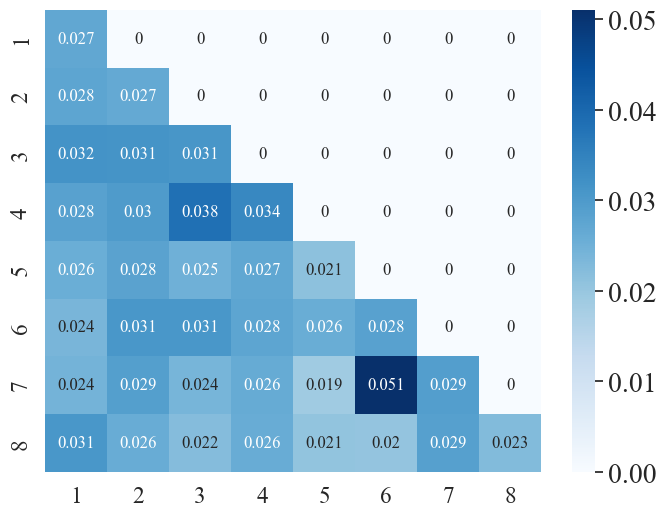

"\nplt.figure(figsize=(8, 6))\nplt.scatter(net_score,net_variance)\n#plt.plot([0, 0, 0, 0])\nfor i, name in enumerate(['a11','a21','a22','a31','a32','a33','a41','a42','a43','a44','a51','a52','a53','a54','a55','a61','a62','a63','a64','a65','a66','a71','a72','a73','a74','a75','a76','a77','a81','a82','a83','a84','a85','a86','a87','a88']):\n    plt.annotate(name,(net_score[i],net_variance[i]))\nplt.title('RF Scatter Plot',fontsize='xx-large',fontweight='heavy')\nplt.xlabel('Importance Score',fontsize=16)\nplt.ylabel('Standard Deviation',fontsize=16)\nx_line = np.linspace(0,0.06)\ny_line = x_line\nplt.plot(x_line, y_line, 'r--')\nplt.show()\nprint(net_score)\nprint(net_variance)\n"

In [20]:
#x_ticks = ['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']
#y_ticks = ['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']
x_ticks = ['1','2','3','4','5','6','7','8']
y_ticks = ['1','2','3','4','5','6','7','8']
plt.figure(figsize=(8, 6))
sns.heatmap(net_importance,xticklabels=x_ticks, yticklabels=y_ticks, annot=True, cmap='Blues')#, linewidths=.5
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
plt.xticks(fontsize=20,font='Times New Roman')
plt.yticks(fontsize=20,font='Times New Roman')
#设置colorbar的刻度字体大小
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
plt.savefig('RF_Heatmap.png', dpi=600, bbox_inches='tight')
plt.show()

'''
plt.figure(figsize=(8, 6))
plt.scatter(net_score,net_variance)
#plt.plot([0, 0, 0, 0])
for i, name in enumerate(['a11','a21','a22','a31','a32','a33','a41','a42','a43','a44','a51','a52','a53','a54','a55','a61','a62','a63','a64','a65','a66','a71','a72','a73','a74','a75','a76','a77','a81','a82','a83','a84','a85','a86','a87','a88']):
    plt.annotate(name,(net_score[i],net_variance[i]))
plt.title('RF Scatter Plot',fontsize='xx-large',fontweight='heavy')
plt.xlabel('Importance Score',fontsize=16)
plt.ylabel('Standard Deviation',fontsize=16)
x_line = np.linspace(0,0.06)
y_line = x_line
plt.plot(x_line, y_line, 'r--')
plt.show()
print(net_score)
print(net_variance)
'''

In [14]:
net_between = 0
net_within = 0
for i in range(8):
    for j in range(i):
        net_between += net_importance[i][j]
for i in range(8):
    net_within += net_importance[i][i]
print(net_between,net_within)
print(net_between/28,net_within/8)

print(((net_between/28)/(net_within/8)))
print(sum_acc/67,sum_pre/67,sum_rec/67,sum_f1/67)

0.7801316336985913 0.21986836630140882
0.027861844060663974 0.027483545787676103
1.0137645366398649
0.7114427860696514 0.5812603648424544 0.7114427860696514 0.6235489220563851
